In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import lmfit
import numpy as np
from astropy.io import ascii
from astropy import units as u
from lmfit.models import PolynomialModel, GaussianModel
from lmfit import Model as mod
from lmfit import minimize, Parameters, report_fit
import scipy.integrate as integrate
import scipy.special as spec

In [2]:
# Open the file in read mode
with open('C:/Users/dhami/Research/STARTastro/DhamiBusch-Research25/COData/COSpectra/159500-20000_CO.txt', 'r') as file:
    # Read the content of the file
    content = file.read()
# Print the content
print(content)

# Velocity_km/s   Brightness
-47.13829 nan
-46.48810 nan
-45.83791 nan
-45.18772 nan
-44.53753 nan
-43.88734 nan
-43.23715 nan
-42.58696 nan
-41.93677 nan
-41.28658 nan
-40.63639 nan
-39.98620 nan
-39.33601 nan
-38.68582 nan
-38.03563 nan
-37.38544 nan
-36.73525 nan
-36.08506 nan
-35.43487 nan
-34.78468 nan
-34.13449 nan
-33.48430 nan
-32.83411 nan
-32.18392 nan
-31.53373 nan
-30.88354 nan
-30.23335 nan
-29.58316 nan
-28.93297 nan
-28.28278 nan
-27.63259 nan
-26.98240 nan
-26.33221 nan
-25.68202 nan
-25.03183 nan
-24.38164 nan
-23.73145 nan
-23.08126 nan
-22.43107 nan
-21.78088 nan
-21.13069 nan
-20.48050 nan
-19.83031 nan
-19.18012 nan
-18.52993 nan
-17.87974 -0.00000
-17.22955 -0.00000
-16.57936 -0.00000
-15.92917 -0.00000
-15.27898 -0.00000
-14.62879 -0.00000
-13.97860 -0.00000
-13.32841 -0.00000
-12.67822 -0.00000
-12.02803 -0.00000
-11.37784 -0.00000
-10.72765 -0.00000
-10.07746 -0.00000
-9.42727 -0.00000
-8.77708 -0.00000
-8.12689 -0.00000
-7.47670 -0.00000
-6.82651 -0.00000
-6.1

In [3]:
len(content)

2297

In [6]:
# Replace 'file_path.txt' with the path to your ASCII file
file_path = 'C:/Users/dhami/Research/STARTastro/DhamiBusch-Research25/COData/COSpectra/159500-20000_CO.txt'
data = pd.read_csv(file_path, sep='\s+', header=None)
# Convert columns to numeric just in case
x = pd.to_numeric(data[0], errors='coerce').values
y = pd.to_numeric(data[1], errors='coerce').values
# Remove NaNs caused by any non-numeric values
mask = ~np.isnan(x) & ~np.isnan(y)
x = x[mask]
y = y[mask]

In [8]:
# Load the file into a DataFrame
df = pd.read_csv(file_path)  # Example: tab-delimited file
# Display the first few rows of the DataFrame
print(data)

             0              1           2
0            #  Velocity_km/s  Brightness
1    -47.13829            NaN         NaN
2    -46.48810            NaN         NaN
3    -45.83791            NaN         NaN
4    -45.18772            NaN         NaN
..         ...            ...         ...
142   44.53850            NaN         NaN
143   45.18869            NaN         NaN
144   45.83888            NaN         NaN
145   46.48907            NaN         NaN
146   47.13926            NaN         NaN

[147 rows x 3 columns]


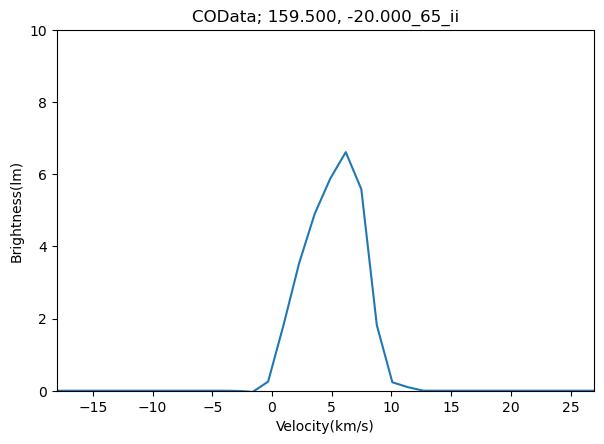

In [10]:
gooddata = np.where((x >= -18) & (x <= 27))
x = x[gooddata]
y = y[gooddata]

plt.xlim([-18, 27])
plt.ylim([0, 10])
plt.plot(x,y)
#plt.axhline(0, color='green')
plt.xlabel('Velocity(km/s)') # Creates a label for the x axis
plt.ylabel('Brightness(lm)') # Creates a label for the y axis
plt.title('COData; 159.500, -20.000_65_ii') # Creates a title for the plot
#plt.legend()
plt.tight_layout(pad=2.0) # so data doesn't overlap

In [288]:
# # RMS red
# noise=np.std(y[gooddata]) * u.K
# noise

<Quantity 2.39138294 K>

In [289]:
# noise_sub=np.std(y_sub[gooddata]) * u.K
# noise_sub

<Quantity 0.41815793 K>

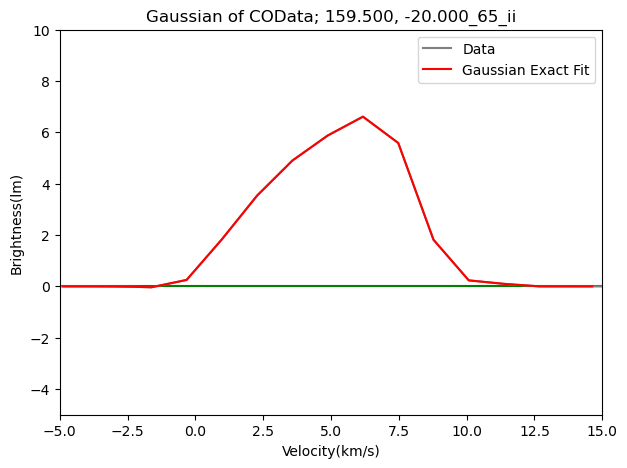

In [24]:
# Gaussian Model-exact fit
gauss_model=GaussianModel()
region = np.where((x >= -5) & (x <= 15))[0]

# Plot data and baseline
plt.figure(figsize=(7, 5))
plt.axhline(0, color='green')
plt.plot(x, y, label='Data', linestyle='solid', color='grey')
plt.xlim([-5, 15])
plt.ylim([-5, 10])
plt.plot(x[region], y[region], '-',label='Gaussian Exact Fit',color='r')
plt.xlabel('Velocity(km/s)')
plt.ylabel('Brightness(lm)')
plt.title('Gaussian of COData; 159.500, -20.000_65_ii') # Creates a title for the plot
plt.legend()
plt.show()

In [18]:
# Better fit of Gaussian
def gaussFit(vel, ta, bounds):
    '''
    Purpose:
    This function fits 4 features in a single spectrum, the features assumed to be the Local arm, inter arm, perseus arm, and outer arm.
    
    Input:
    vel -- x axes, velocity
    ta -- y axes, antenna temperature
    bounds -- an array of bounds for np.where commands later in the function to setup fit ranges.
    n = number of gaussian components

    Output:
    fitResult -- an array of 3 fit results from LMFIT for a single gaussian
    '''
    x=vel 
    y=ta
    # Set bounds:
    region = np.where((x >= bounds[0]) & (x <= bounds[1]))[0]
    # Initial Guess of the parameters
    params = gauss_model.guess(y[region], x=x[region])
    # Actual best fit to the data, given initial guess
    regionfit= gauss_model.fit(y[region], params, x=x[region])
    #fitresult = [region1fit, region2fit, region3fit]
    fitresult = [regionfit]
    return fitresult

In [19]:
fitResult = gaussFit(x, y, bounds = [-5, 15])

C:\Users\dhami\miniforge3\envs\STARTastro\Lib\site-packages\uncertainties\core.py:1024: UserWarning: Using UFloat objects with std_dev==0 may give unexpected results.
  warn("Using UFloat objects with std_dev==0 may give unexpected results.")


In [20]:
fitResult[0].params

name,value,standard error,relative error,initial value,min,max,vary,expression
amplitude,40.9264164,1.26298642,(3.09%),58.34649339495,-inf,inf,True,
center,5.31861629,0.08814291,(1.66%),5.202005,-inf,inf,True,
sigma,2.47355847,0.08814428,(3.56%),2.9258550000000003,0.00000000,inf,True,
fwhm,5.82478496,0.20756391,(3.56%),6.889861871100001,-inf,inf,False,2.3548200*sigma
height,6.60072478,0.20369900,(3.09%),7.955583674486999,-inf,inf,False,"0.3989423*amplitude/max(1e-15, sigma)"


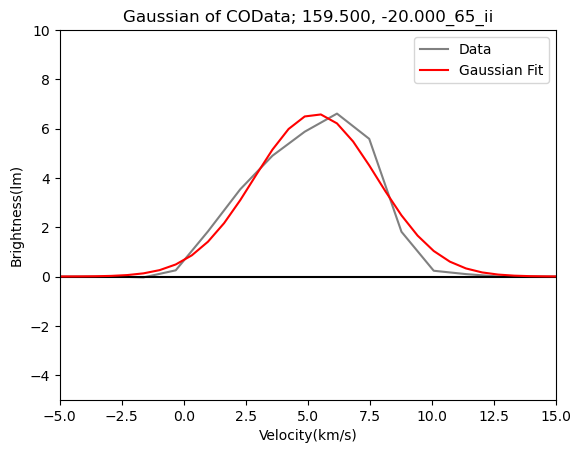

In [26]:
y_gauss_region = gauss_model.eval(fitResult[0].params, x=x)
# plot
plt.plot(x, y, label='Data', linestyle='solid', color='grey')
plt.axhline(0, color='k')
plt.xlim([-5, 15])
plt.ylim([-5, 10])
plt.plot(x, y_gauss_region, '-',label='Gaussian Fit',color='red')
plt.xlabel('Velocity(km/s)')
plt.ylabel('Brightness(lm)')
plt.title('Gaussian of COData; 159.500, -20.000_65_ii')
plt.legend()
plt.show()

In [295]:
# Computing the Integral
def integral(vel, ta, bounds, deltav):
    mask = (vel >= bounds[0]) & (vel <= bounds[1])
    deltav = vel[1]-vel[0]
    return np.sum(ta[mask])*deltav

In [298]:
vel = x
ta = y_sub
deltav = vel[1]-vel[0]
bounds = [-5, 15]
# Baseline Subtraction
poly_model = PolynomialModel(degree=4)
gooddata = np.where((vel >= -5) & (vel <= 15))[0]
params = poly_model.guess(ta[gooddata], x=vel[gooddata])
result = poly_model.fit(ta[gooddata], params, x=vel[gooddata])
y_eval = poly_model.eval(result.params, x=vel)
ta = y - y_eval
# Compute Integral
result = integral(vel, ta, bounds, deltav)
print(f"Integral from {bounds[0]} to {bounds[1]} = {result}")

Integral from -5 to 15 = 39.9418413956076
